In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Perceptron Class Definition**

Note: Functions and features required for furthur questions are already defined in this class

In [ ]:
class Perceptron:

  def __init__(self,weight_n=2,weights=None,bias=0,learn=0.005,debug=False,activation=1):
    self.weight_n = weight_n
    if weights == None:
      self.weights = np.random.uniform(0,1,self.weight_n,)
    else:
      self.weights = np.array(weights)
    self.bias = bias
    self.count=0
    self.error = 0
    self.learn = learn
    self.debug = debug
    self.activation = activation
    self.epochs=[]
    self.error_a=[]
    if activation not in [1,2,3]:
      exit()

  def display_param(self):  #displays the parameters
    print("Weights: ",self.weights)
    print("Bias: ",self.bias)
    print("Learning rate: ",self.learn)
  
  def sign(self,inp):
    if inp < 0:
      return -1.0
    elif inp == 0:
      return 0.0
    else:
      return 1.0

  def sigmoid(self,inp):
    z = 1/(1+np.exp(-inp))
    if z > 0.5:
      return 1
    else:
      return -1
  
  def ReLU(self,inp):
    if inp > 0:
      return inp
    else:
      return -1

  def check_error(self):  #checks if total error in an epoch os zero or not
    return self.error == 0

  def forw_back_prop(self,gate_data): #for calculation of forwards and backward propagation
    if gate_data.shape[1] != self.weight_n+1:
      print("Invalid data shape")
      return
    size = gate_data.shape[0]
    i=0
    self.display_param()
    while True:
      #print("Error: ",self.error)
      y_in = 0
      for j in range(self.weight_n):
        y_in += self.weights[j]*gate_data[i%size][j]
      y_in += self.bias
      if self.activation == 1:
        out_pred = self.sign(y_in)
      elif self.activation == 2:
        out_pred = self.sigmoid(y_in)
      elif self.activation == 3:
        out_pred = self.ReLU(y_in)
      out_real = gate_data[i%size][self.weight_n]
      p = out_real-out_pred
      if out_real != out_pred:
        #print(p)
        self.error += (out_pred-out_real)**2
        self.bias = self.bias +  (self.learn*p)
        for k in range(len(self.weights)):
          self.weights[k] = self.weights[k] + (self.learn*p*gate_data[i%size][k])
      if i%size == size-1:
        if self.debug == True:
          print("Epoch ",self.count,": Error: ",self.error/self.weight_n)
        if self.check_error():
          self.epochs.append(self.count)
          self.error_a.append(float(self.error)/self.weight_n)
          break
        self.epochs.append(self.count)
        self.error_a.append(float(self.error)/self.weight_n)
        self.count += 1
        if self.count >= 1000:
          print("1000 Epochs reached . .stopping . .")
          break
        self.error=0
      i+=1
    print("Epochs ",self.count+1)
  
  def predict(self,input):  #for predicting values after training the preceptron
    if len(input) != self.weight_n:
      print("Invalid Data shape!")
    pred = 0
    for i in range(self.weight_n):
      pred += self.weights[i]*input[i]
    pred += self.bias
    pred = self.sign(pred)
    print("Input: ",input,"   Predicted output: ",pred)

  def map(self): #returns the data requred for plotting
    return self.epochs,self.error_a

**Defining Input data for And gate and Xor gate**

In [ ]:
and_gate_data = np.full((4,3),-1,dtype=float)
and_gate_data[1][1] = 1
and_gate_data[2][0] = 1
and_gate_data[3][0],and_gate_data[3][1],and_gate_data[3][2] = 1,1,1

xor_gate_data = np.full((4,3),-1,dtype=float)
xor_gate_data[1][1] = 1
xor_gate_data[2][0] = 1
xor_gate_data[3][0],and_gate_data[3][1],and_gate_data[2][2] = 1,1,1

A1: Develop the aboveperceptron. Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05Use Sign activation functionto learn the weights of the network to implement above provided AND gate logic. Sign activation function is described below.

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.05
Epochs  29


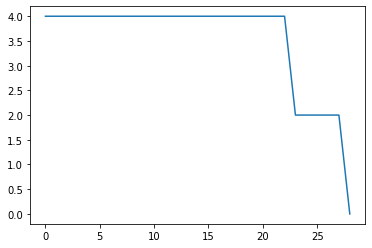

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10,learn=0.05)
model.forw_back_prop(and_gate_data)
x,y = model.map()
plt.plot(x,y)

**A2:  Repeat the above A1 experiment with following activation functions. Compare the iterations taken to converge against each of the activation functions.Keep the learning rate same as A1.•Sigmoid function•ReLU function**

In [ ]:
print("Activation function parameter: \n1 -> sign\n2 -> Sigmoid\n3 -> ReLU\n")

Activation function parameter: 
1 -> sign
2 -> Sigmoid
3 -> ReLU



Using Sigmoid Activation function

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10.0
Learning rate:  0.05
Epochs  29


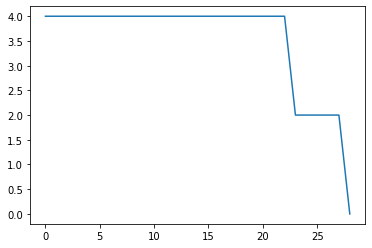

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10.0,learn=0.05,activation=2)
model.forw_back_prop(and_gate_data)
x,y = model.map()
plt.plot(x,y)

Using ReLU Activation function

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.05
Epochs  342


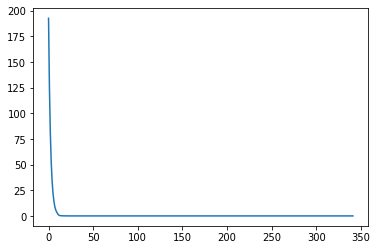

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10,learn=0.05,activation=3)
model.forw_back_prop(and_gate_data)
x,y = model.map()
plt.plot(x,y)

**A3:  Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for learning to converge against the learning rates.**

Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.1
Epochs  149


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.2
Epochs  64


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.3
Epochs  28


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.4
1000 Epochs reached . .stopping . .
Epochs  1001


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.5
Epochs  54


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.6
1000 Epochs reached . .stopping . .
Epochs  1001


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.7
1000 Epochs reached . .stopping . .
Epochs  1001


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.8
1000 Epochs reached . .stopping . .
Epochs  1001


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.9
1000 Epochs reached . .stopping . .
Epochs  1001


Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  1
1000 Epochs reached . .stopping . .
Epochs  1001




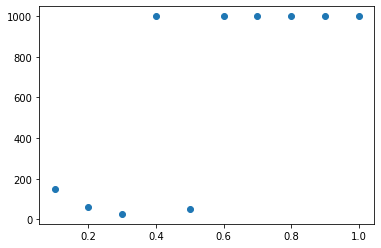

In [ ]:
learn_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
data_y=[]
for i in range(len(learn_rate)):
  model = Perceptron(weights=[0.2,-0.75],bias=10,learn=learn_rate[i],activation=3)
  model.forw_back_prop(and_gate_data)
  data_y.append(model.epochs[-1])
  print("\n")
plt.scatter(np.array(learn_rate),np.array(data_y))

**A4: Repeat the above exercises for XOR gate logic.**

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.05
Epochs  40


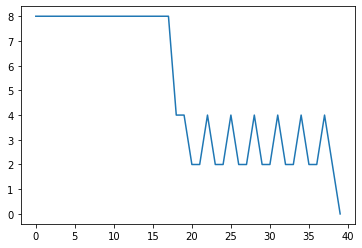

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10,learn=0.05)
model.forw_back_prop(xor_gate_data)
x,y = model.map()
plt.plot(x,y)

In [ ]:
print("Activation function parameter: \n1 -> sign\n2 -> Sigmoid\n3 -> ReLU\n")

Activation function parameter: 
1 -> sign
2 -> Sigmoid
3 -> ReLU



Using Sigmoid Activation function

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.05
Epochs  40


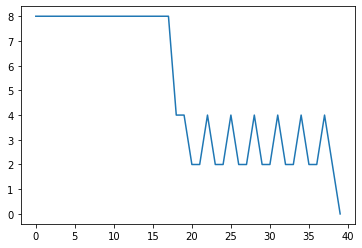

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10,learn=0.05,activation=2)
model.forw_back_prop(xor_gate_data)
x,y = model.map()
plt.plot(x,y)

Using ReLU function

 Using given Weights and bias:
Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.05
Epochs  19


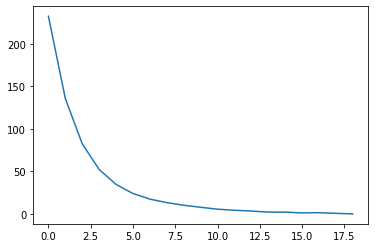

In [ ]:
print(" Using given Weights and bias:")
model = Perceptron(weights=[0.2,-0.75],bias=10,learn=0.05,activation=3)
model.forw_back_prop(xor_gate_data)
x,y = model.map()
plt.plot(x,y)

Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.1
Epochs  149


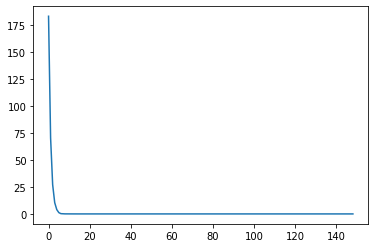



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.2
Epochs  64


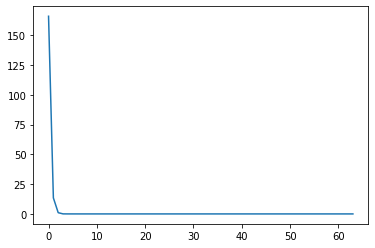



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.3
Epochs  28


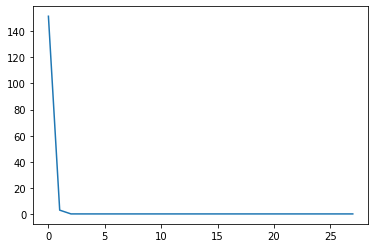



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.4
1000 Epochs reached . .stopping . .
Epochs  1001


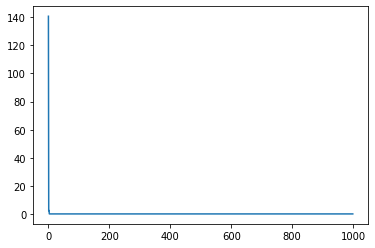



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.5
Epochs  54


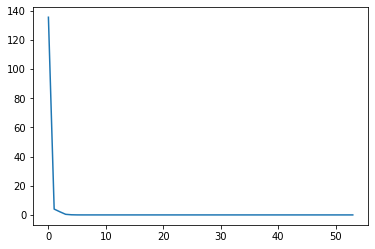



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.6
1000 Epochs reached . .stopping . .
Epochs  1001


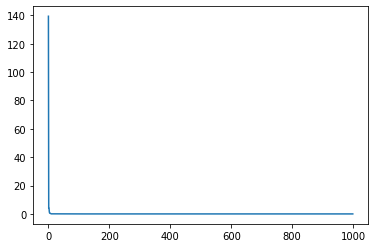



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.7
1000 Epochs reached . .stopping . .
Epochs  1001


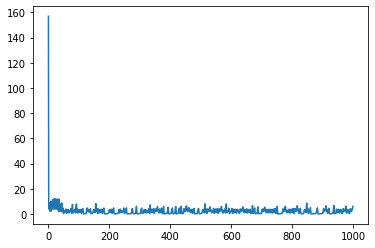



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.8
1000 Epochs reached . .stopping . .
Epochs  1001


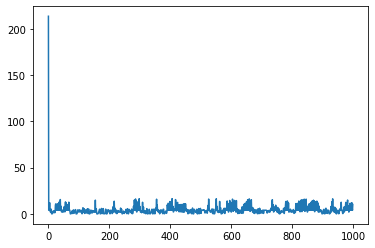



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  0.9
1000 Epochs reached . .stopping . .
Epochs  1001


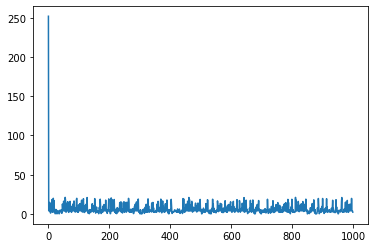



Weights:  [ 0.2  -0.75]
Bias:  10
Learning rate:  1
1000 Epochs reached . .stopping . .
Epochs  1001


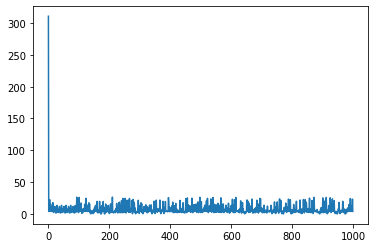

In [ ]:
learn_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in range(len(learn_rate)):
  model = Perceptron(weights=[0.2,-0.75],bias=10,learn=learn_rate[i],activation=3)
  model.forw_back_prop(and_gate_data)
  x,y = model.map()
  plt.plot(x,y)
  plt.show()
  print("\n")

A5: Use customer data provided below. Build a perceptron & learn to classify the transactions as
high or low value as provided in the below table. Use sigmoid as the activation function. Initialize the
weights & learning rate with your choice.

In [ ]:
cust_data = [[20,6,2,386,1]]
cust_data.append([16,3,6,289,1])
cust_data.append([27,6,2,393,1])
cust_data.append([19,1,2,110,-1])
cust_data.append([24,4,2,280,1])
cust_data.append([22,1,5,167,-1])
cust_data.append([15,4,2,271,1])
cust_data.append([18,4,2,274,1])
cust_data.append([21,1,4,148,-1])
cust_data.append([16,2,4,198,-1])
cust_data = np.array(cust_data)
print(cust_data.shape)

(10, 5)


Weights:  [0.25592502 0.90486534 0.65565541 0.75988874]
Bias:  0
Learning rate:  0.05
Epochs  733


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


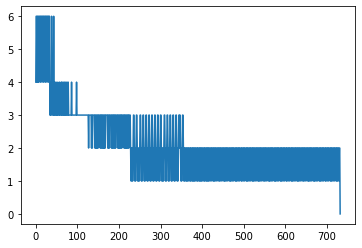

In [ ]:
model = Perceptron(weight_n=4,learn=0.05,activation=2)
model.forw_back_prop(cust_data)
x,y = model.map()
plt.plot(x,y)
final_weights = model.weights

**A6: Compare the results obtained from above perceptron learning to the ones obtained with matrix
pseudo-inverse**

[[-0.08060388  0.04409209 -0.12979021  0.00823736]] [-577.94407498   94.70486534 -251.04434459   50.95988874]

Values from inverse matrix multiplication


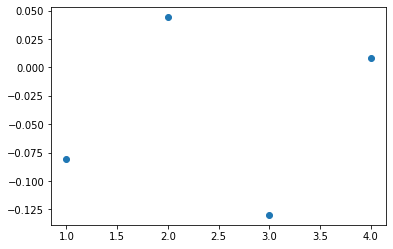



Values from perceptron


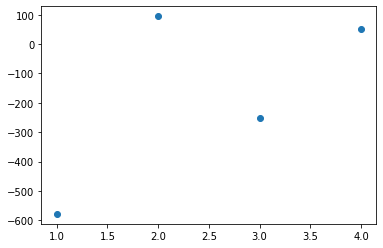

In [ ]:
y = cust_data[:,4]
y = y.reshape(-1,1)
input1_inv = np.linalg.pinv(cust_data[:,0:4])
final_out = np.matmul(input1_inv,y)
print(final_out.T,final_weights)
print("\nValues from inverse matrix multiplication")
plt.scatter([1,2,3,4],final_out)
plt.show()
print("\n\nValues from perceptron")
plt.scatter([1,2,3,4],final_weights)
plt.show()

**Optional**

In [ ]:
print("With Sigmoid")

print("\n\nTweak 1:    Random value for weights")
model = Perceptron(bias=10,learn=0.005,activation=2)
model.forw_back_prop(and_gate_data)

print("\n\nTweak 2:    Reducing bias")
model = Perceptron(bias=4,learn=0.35,activation=2)
model.forw_back_prop(and_gate_data)

print("\n\nTweak 3:    Increasing Learning rate")
model = Perceptron(bias=0.5,learn=0.35,activation=2)
model.forw_back_prop(and_gate_data)

print("\n\nOptimal Solution")
model = Perceptron(bias=0.5,learn=0.35,activation=2)
model.forw_back_prop(and_gate_data)
model.predict([1,-1])

With Sigmoid


Tweak 1:    Random value for weights
Weights:  [0.40319483 0.69184814]
Bias:  10
Learning rate:  0.005
Epochs  270


Tweak 2:    Reducing bias
Weights:  [0.13068857 0.72500616]
Bias:  4
Learning rate:  0.35
Epochs  3


Tweak 3:    Increasing Learning rate
Weights:  [0.36320989 0.60453695]
Bias:  0.5
Learning rate:  0.35
Epochs  2


Optimal Solution
Weights:  [0.85376456 0.80439378]
Bias:  0.5
Learning rate:  0.35
Epochs  2
Input:  [1, -1]    Predicted output:  1.0


In [ ]:
"""while True:
      y_in = 0
      for j in range(weight_n):
        y_in += weights[j]*gate_data[i%size][j]
      y_in += bias
      out_pred = sign(y_in)
      out_real = gate_data[i%size][2]
      p = out_real-out_pred
      if out_real != out_pred:
        error += (out_pred-out_real)**2
        bias = bias +  (learn*p)
        for k in range(weight_n):
          weights[k] = weights[k] + (learn*p*gate_data[i%size][k])
      if i%size == size-1:
        print("Epoch ",count,": Error: ",error/weight_n)
        if check_error():
          break
        count += 1
        if count >= 1000:
          print("1000 Epochs reached . .stopping . .")
          break
        error=0
      i+=1"""